<a target="_blank" href="https://colab.research.google.com/github/huseyinegg/IE423-2024SUMMER/blob/main/M.HuseyinBeyribey_IE423_Final.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Muhammed Hüseyin Beyribey - IE 423 - FINAL EXAM

[Data Source](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load The Data**

In [2]:
dfOSI = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/online_shoppers_intention.csv')
dfOSI.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dfOSI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We have 17 Features and our Target variable is Revenue which is a boolean Column.

Firstly, I will create two list variable stores the columns according to their dtype.

In [4]:
nonnumerical_features = [col for col in dfOSI.columns if dfOSI[col].dtype in ['object', 'bool']]
numerical_features = [col for col in dfOSI.columns if dfOSI[col].dtype in ['int64', 'float64']]

print("Non-Numerical Columns: {nonnumerical_features}".format(nonnumerical_features=nonnumerical_features))
print("Numerical Columns: {numerical_columns}".format(numerical_columns=numerical_features))

Non-Numerical Columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']
Numerical Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [5]:
dfOSI.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Visualization**

First I will visualize the numerical_features

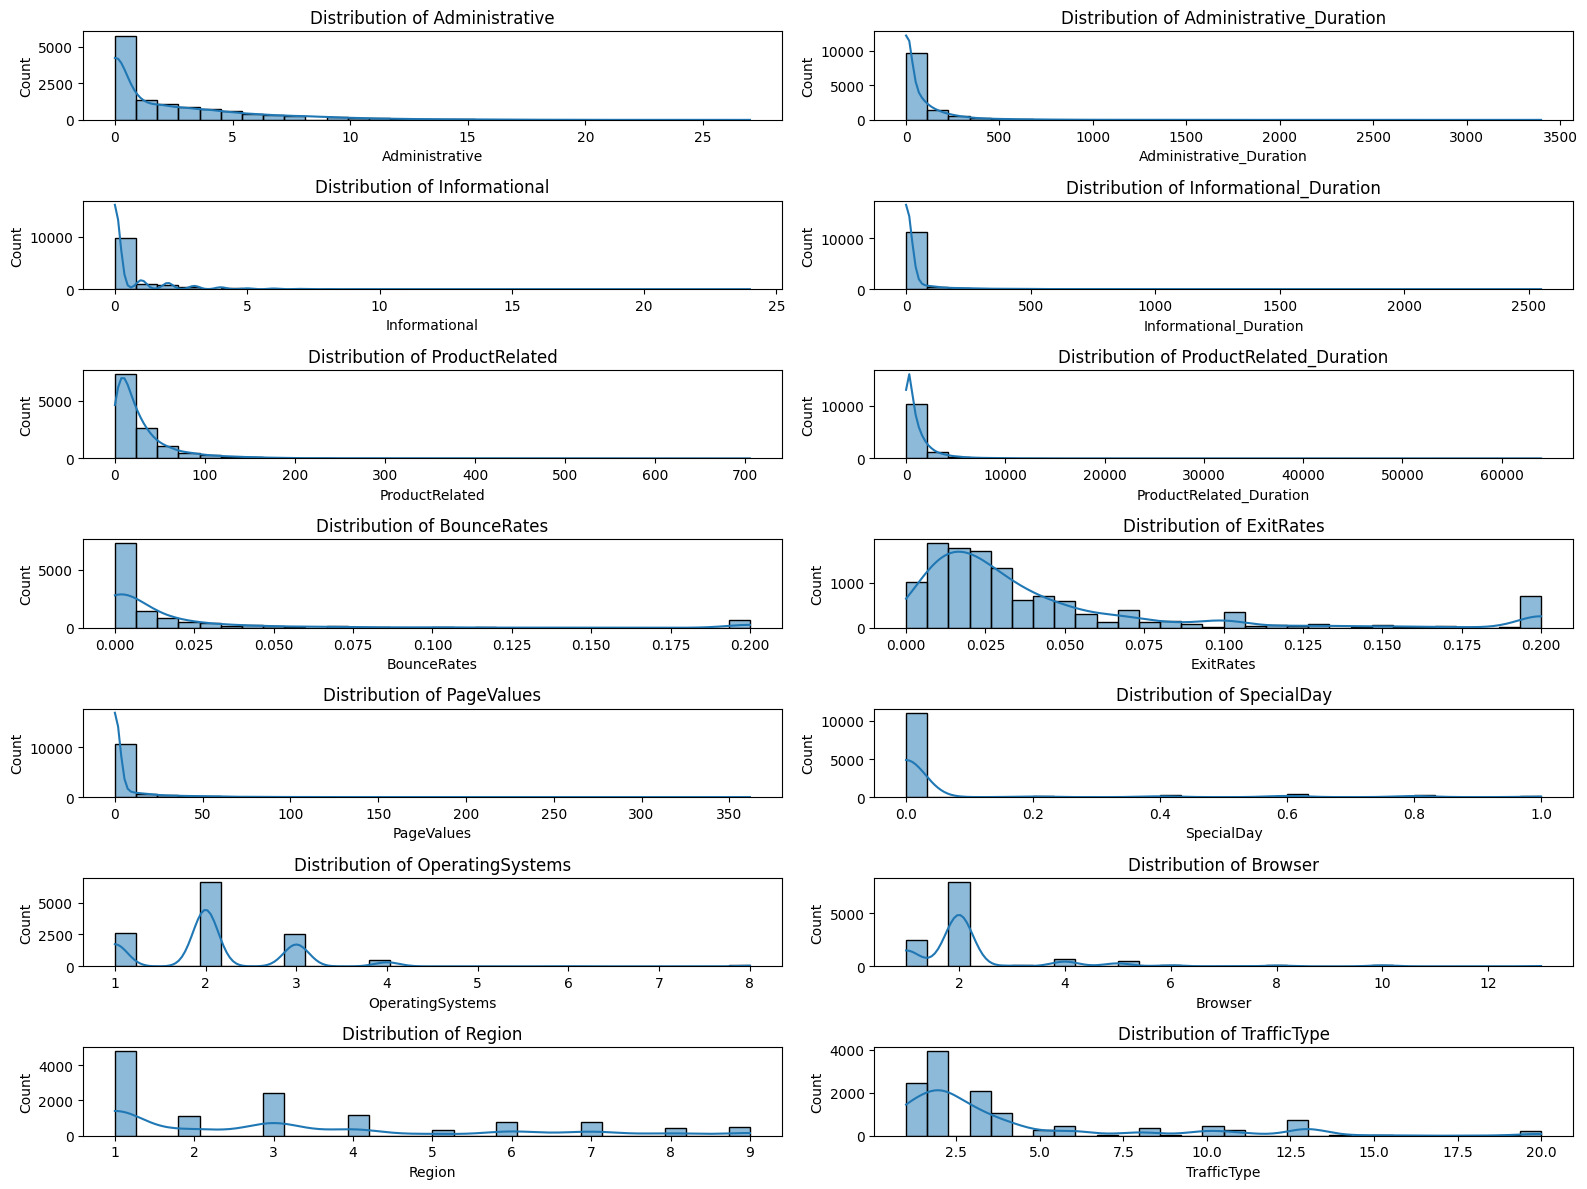

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = (len(numerical_features) + 1) // 2

plt.figure(figsize=(16, 12))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(dfOSI[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Let's check non-numerical values

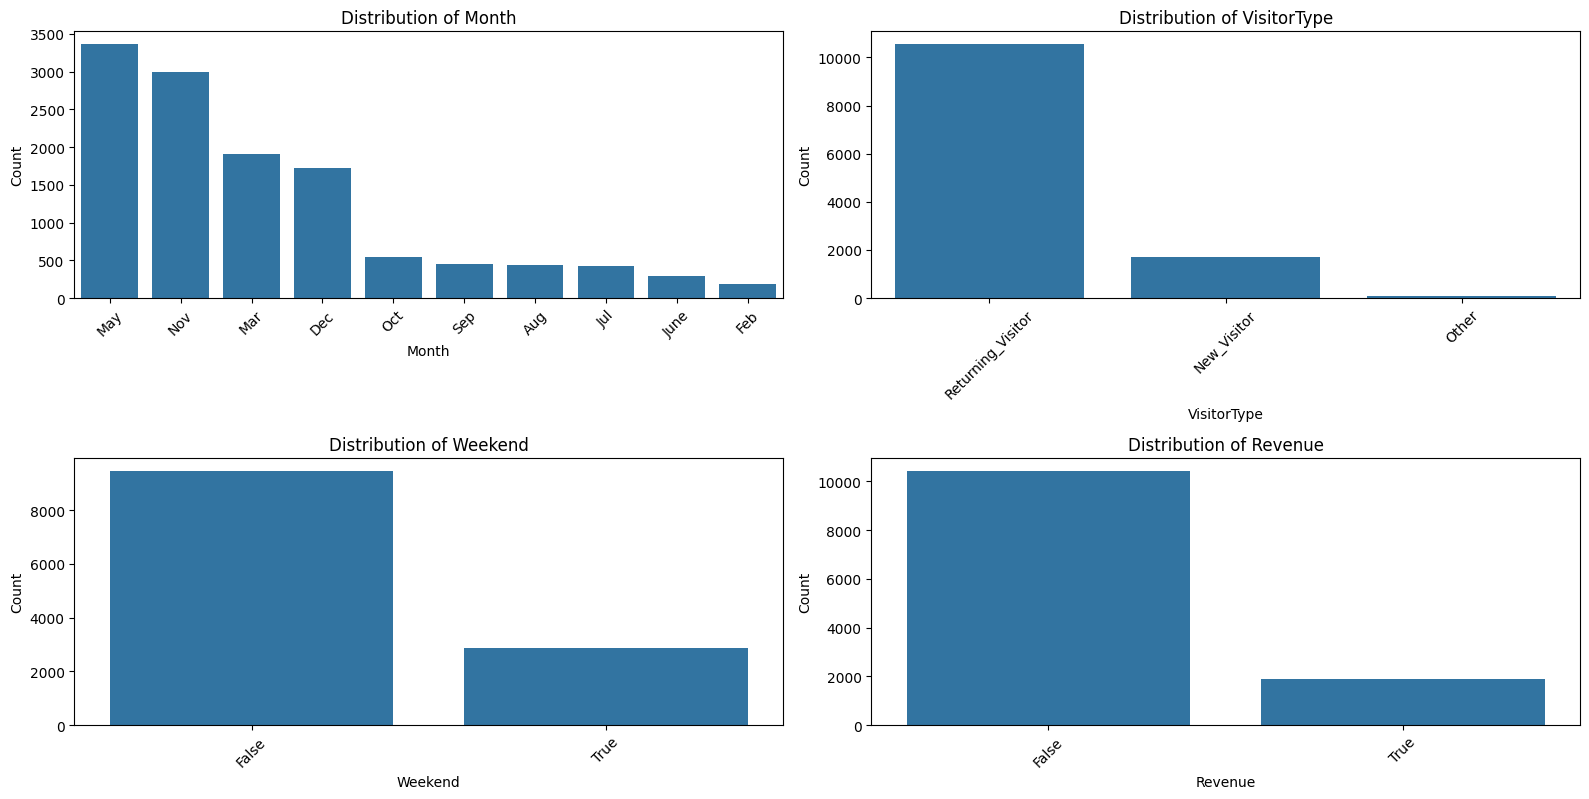

In [7]:
plt.figure(figsize=(16, 16))

# Plot bar plots for categorical features
for i, feature in enumerate(nonnumerical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=dfOSI, x=feature, order=dfOSI[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Distrubtion of revenue is pretty inbalanced which while we proceed can cause problems. I will keep it in my mind.

**Correlation**

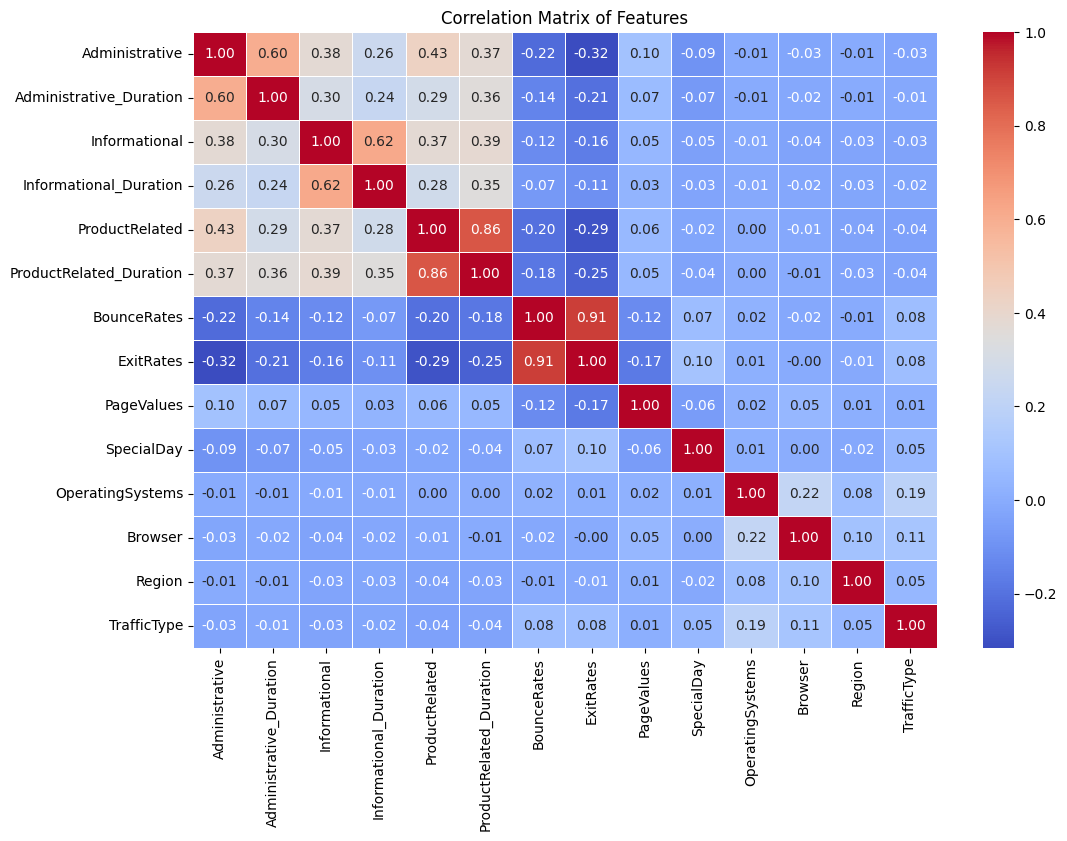

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(dfOSI[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

Between some numerical variables there are strong relation. For example

ProductRelated and ProductRelated_Duration

BounceRates and ExitRates

# Data Preprocessing

Firstly let's check NaN values and drop duplicates.

In [9]:
print(dfOSI.duplicated().value_counts())

# Check for NaN values in the dataset
nan_values = dfOSI.isna().sum()

# Drop duplicate rows
dfOSI = dfOSI.drop_duplicates()

# Display the number of NaN values per column and the difference in shape after dropping duplicates
nan_values, dfOSI.shape, dfOSI.shape, dfOSI.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64


(Administrative             0
 Administrative_Duration    0
 Informational              0
 Informational_Duration     0
 ProductRelated             0
 ProductRelated_Duration    0
 BounceRates                0
 ExitRates                  0
 PageValues                 0
 SpecialDay                 0
 Month                      0
 OperatingSystems           0
 Browser                    0
 Region                     0
 TrafficType                0
 VisitorType                0
 Weekend                    0
 Revenue                    0
 dtype: int64,
 (12205, 18),
 (12205, 18),
 False    12205
 Name: count, dtype: int64)

**Encoding**

In [10]:
nonnumerical_features

['Month', 'VisitorType', 'Weekend', 'Revenue']

I will check unique values within these columns

In [11]:
unique_month = dfOSI['Month'].unique()
unique_visitor_type = dfOSI['VisitorType'].unique()
unique_weekend = dfOSI['Weekend'].unique()
unique_revenue = dfOSI['Revenue'].unique()

unique_values = {
    "Month": unique_month,
    "VisitorType": unique_visitor_type,
    "Weekend": unique_weekend,
    "Revenue": unique_revenue
}

unique_values

{'Month': array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object),
 'VisitorType': array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 'Weekend': array([False,  True]),
 'Revenue': array([False,  True])}

In [12]:
from sklearn.preprocessing import LabelEncoder

dfOSI_encoded = dfOSI.copy()
label_encoder = LabelEncoder()

dfOSI_encoded['Month'] = label_encoder.fit_transform(dfOSI_encoded['Month'])
dfOSI_encoded['VisitorType'] = label_encoder.fit_transform(dfOSI_encoded['VisitorType'])
dfOSI_encoded['Weekend'] = label_encoder.fit_transform(dfOSI_encoded['Weekend'])
dfOSI_encoded['Revenue'] = label_encoder.fit_transform(dfOSI_encoded['Revenue'])

In [13]:
unique_month = dfOSI_encoded['Month'].unique()
unique_visitor_type = dfOSI_encoded['VisitorType'].unique()
unique_weekend = dfOSI_encoded['Weekend'].unique()
unique_revenue = dfOSI_encoded['Revenue'].unique()

unique_values = {
    "Month": unique_month,
    "VisitorType": unique_visitor_type,
    "Weekend": unique_weekend,
    "Revenue": unique_revenue
}

unique_values

{'Month': array([2, 5, 6, 8, 4, 3, 0, 7, 9, 1]),
 'VisitorType': array([2, 0, 1]),
 'Weekend': array([0, 1]),
 'Revenue': array([0, 1])}

In [14]:
dfOSI_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

Now I have no non-numerical dtype in my `dfOSI_encoded` dataframe.

# Feature Engineering and Standardizing the Data

In the Final Sheet Standardizing comes before Feature Engineering but StandardScaler assumes independent features Creating new features from already standardized features can distort this assumption. Therefore I will first apply feature Engineering and afther that will Normalize/standardize features.

**Feature Engineering**

Some ideas:

TotalDuration: Sum of Administrative_Duration, Informational_Duration, and ProductRelated_Duration to attain the total time spent on the site.

TotalPagesVisited: Sum of Administrative, Informational, and ProductRelated to get the total number of pages visited.

PageEfficiency: Ratio of PageValues to TotalPagesVisited, indicating the average value per page visited.

DurationPerPage: Ratio of TotalDuration to TotalPagesVisited, indicating the average time spent per page.

IsReturningVisitor: Derived from VisitorType, where 1 indicates a returning visitor and 0 indicates a new visitor.

BounceToExitRateRatio: This ratio provides a measure to understand whether pages with high exit rates also experience high bounce rates or vice versa. High value represents that users are frequently leaving the site after viewing only a single page.



In [15]:
dfOSI_encoded_featured = dfOSI_encoded.copy()
# TotalDuration
dfOSI_encoded_featured['TotalDuration'] = dfOSI_encoded_featured['Administrative_Duration'] + dfOSI_encoded_featured['Informational_Duration'] + dfOSI_encoded_featured['ProductRelated_Duration']

# TotalPagesVisited
dfOSI_encoded_featured['TotalPagesVisited'] = dfOSI_encoded_featured['Administrative'] + dfOSI_encoded_featured['Informational'] + dfOSI_encoded_featured['ProductRelated']

# PageEfficiency
dfOSI_encoded_featured['PageEfficiency'] = dfOSI_encoded_featured['PageValues'] / dfOSI_encoded_featured['TotalPagesVisited']
dfOSI_encoded_featured['PageEfficiency'].fillna(0, inplace=True)  # division by zero

# DurationPerPage
dfOSI_encoded_featured['DurationPerPage'] = dfOSI_encoded_featured['TotalDuration'] / dfOSI_encoded_featured['TotalPagesVisited']
dfOSI_encoded_featured['DurationPerPage'].fillna(0, inplace=True)  # same 0

# IsReturningVisitor
dfOSI_encoded_featured['IsReturningVisitor'] = dfOSI['VisitorType'].apply(lambda x: 1 if x == 'Returning_Visitor' else 0)

# BounceToExitRateRatio
dfOSI_encoded_featured['BounceToExitRateRatio'] = dfOSI_encoded_featured['BounceRates'] / (dfOSI_encoded_featured['ExitRates'] + 1)

In [16]:
dfOSI_encoded_featured.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,TotalDuration,TotalPagesVisited,PageEfficiency,DurationPerPage,IsReturningVisitor,BounceToExitRateRatio
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,...,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,...,4.073904,1.715936,0.234248,0.156329,1323.454242,34.893240,0.288987,38.179096,0.854650,0.018035
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,...,4.016654,0.693425,0.423545,0.363182,2043.871589,46.627336,1.502004,43.472877,0.352468,0.038134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,231.666667,9.000000,0.000000,18.555556,1.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,690.958333,20.000000,0.000000,29.970787,1.000000,0.002858
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,...,4.000000,2.000000,0.000000,0.000000,1643.958333,42.000000,0.000000,45.688278,1.000000,0.015831
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,20.000000,2.000000,1.000000,1.000000,69921.647230,746.000000,58.372090,1411.000000,1.000000,0.166667


**Select important features using techniques like correlation matrix and feature importance
from models**

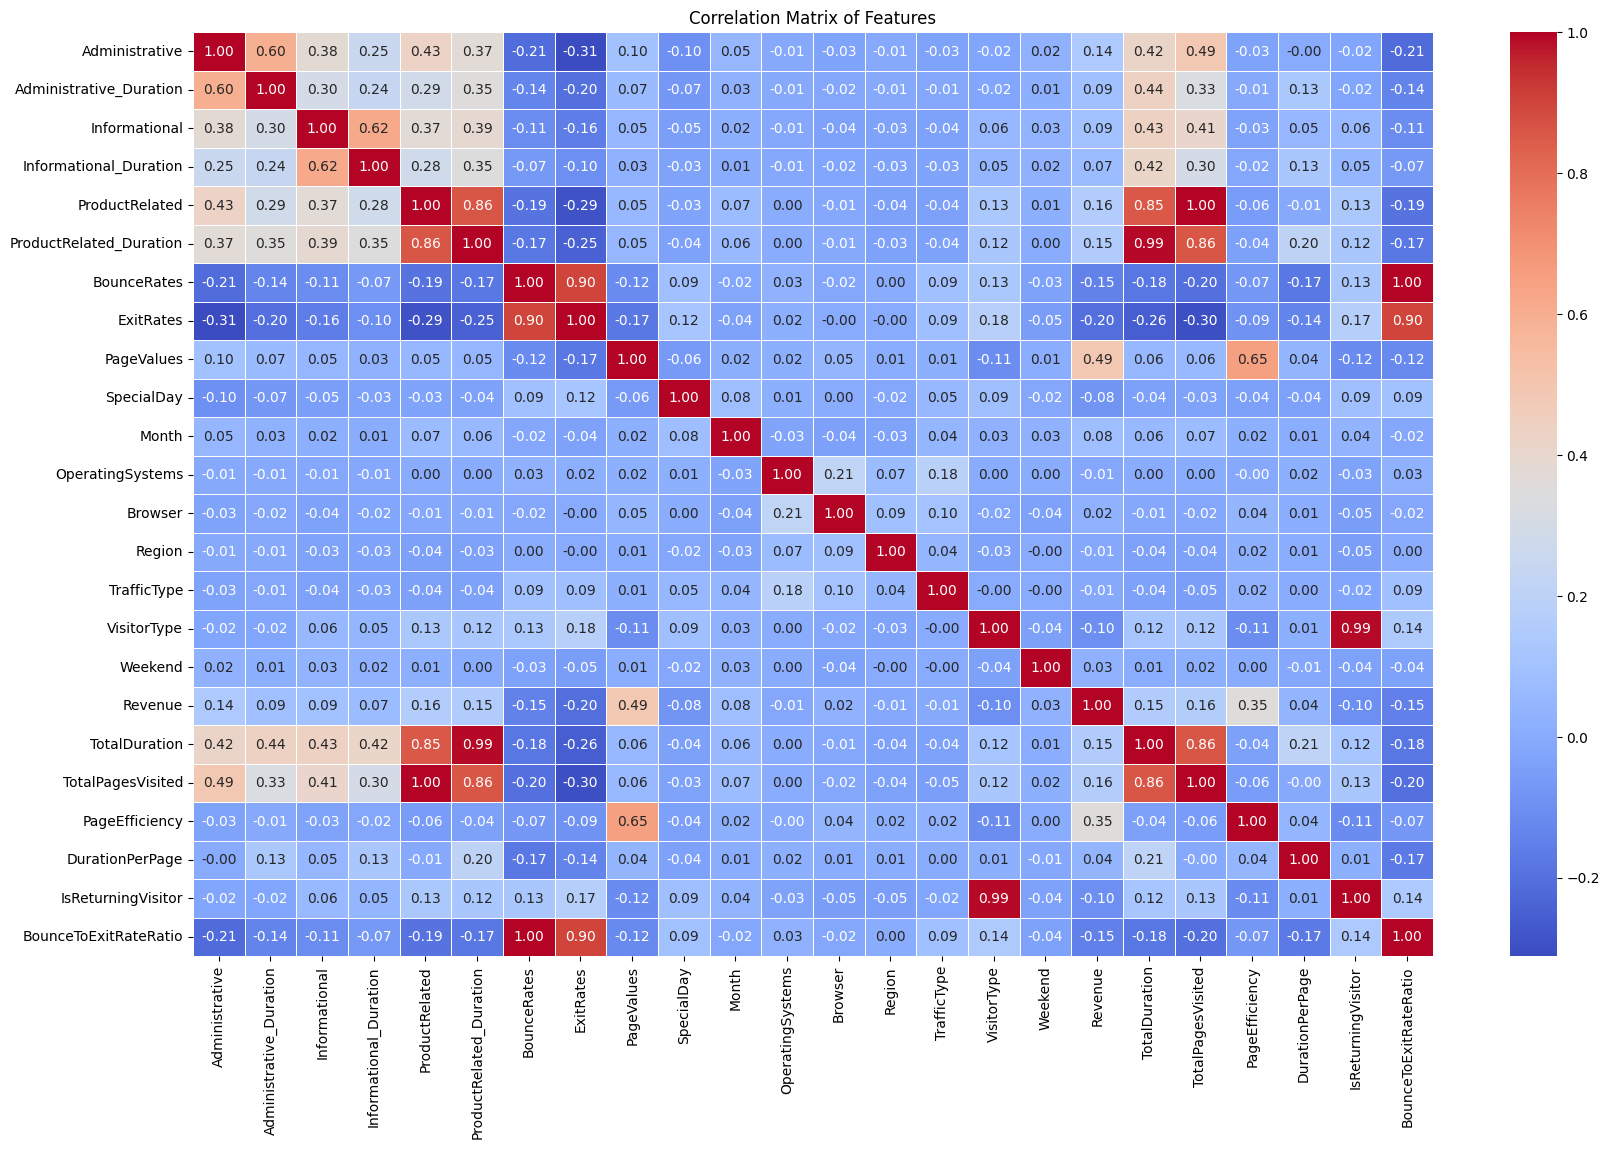

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(dfOSI_encoded_featured.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [18]:
# Import necessary modules for feature importance from models
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


dfOSI_encoded_featured['Revenue'] = dfOSI_encoded_featured['Revenue'].astype(int)

X = dfOSI_encoded_featured.drop(columns=['Revenue', 'VisitorType'])  # 'VisitorType' is dropped as I created 'IsReturningVisitor'
y = dfOSI_encoded_featured['Revenue']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


feature_importances

,Feature,Importance
8,PageValues,0.217393
18,PageEfficiency,0.194566
7,ExitRates,0.059129
5,ProductRelated_Duration,0.052808
16,TotalDuration,0.051105
19,DurationPerPage,0.047651
17,TotalPagesVisited,0.044130
4,ProductRelated,0.042315
1,Administrative_Duration,0.039244
21,BounceToExitRateRatio,0.037341


Our new feature PageEfficiency is pretty important while "IsReturningVisitor" is not that important for revenue interestingly.

**Normalize/standardize numerical features.**

In [20]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns and excluding the target 'Revenue'
numerical_columns = [col for col in dfOSI_encoded_featured.columns if dfOSI_encoded_featured[col].dtype in ['int64', 'float64'] and col != 'Revenue']

scaler = StandardScaler()

# Applying standardization actually numerical_columns includes all columns except for "Revenue"
dfOSI_encoded_featured[numerical_columns] = scaler.fit_transform(dfOSI_encoded_featured[numerical_columns])

dfOSI_encoded_featured[numerical_columns].describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,TotalDuration,TotalPagesVisited,PageEfficiency,DurationPerPage,IsReturningVisitor,BounceToExitRateRatio
count,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,12205.000000,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,...,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04,1.220500e+04
mean,-8.150429e-17,-1.397216e-17,2.794433e-17,-4.191649e-17,-5.588865e-17,0.000000,2.561563e-17,6.520343e-17,1.862955e-17,-9.314776e-17,...,-5.821735e-18,-1.862955e-17,-1.187634e-16,-3.260172e-17,-5.588865e-17,5.588865e-17,2.328694e-17,1.519473e-16,-3.725910e-17,-6.520343e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-7.023024e-01,-4.600193e-01,-3.988242e-01,-2.462572e-01,-7.186438e-01,-0.628793,-4.501371e-01,-8.982857e-01,-3.189623e-01,-3.102396e-01,...,-8.963702e-01,-7.653211e-01,-2.474682e+00,-5.530879e-01,-6.475497e-01,-7.483737e-01,-1.924088e-01,-8.782639e-01,-2.424857e+00,-4.729543e-01
25%,-7.023024e-01,-4.600193e-01,-3.988242e-01,-2.462572e-01,-5.392387e-01,-0.528247,-4.501371e-01,-5.899945e-01,-3.189623e-01,-3.102396e-01,...,-8.963702e-01,-5.163475e-01,4.096702e-01,-5.530879e-01,-5.341981e-01,-5.553459e-01,-1.924088e-01,-4.514158e-01,4.123954e-01,-4.729543e-01
50%,-4.020291e-01,-4.093107e-01,-3.988242e-01,-2.462572e-01,-3.149824e-01,-0.311556,-3.860858e-01,-3.567007e-01,-3.189623e-01,-3.102396e-01,...,-6.381449e-02,-5.163475e-01,4.096702e-01,-5.530879e-01,-3.094724e-01,-3.194232e-01,-1.924088e-01,-1.888222e-01,4.123954e-01,-3.980024e-01
75%,4.987907e-01,7.354819e-02,-3.988242e-01,-2.462572e-01,1.335304e-01,0.140750,-8.184213e-02,1.530263e-01,-3.189623e-01,-3.102396e-01,...,3.524634e-01,-1.840018e-02,4.096702e-01,-5.530879e-01,1.568187e-01,1.524224e-01,-1.924088e-01,1.727397e-01,4.123954e-01,-5.779555e-02
max,7.405076e+00,1.868953e+01,1.841638e+01,1.778084e+01,1.509143e+01,32.699034,3.969402e+00,3.434394e+00,1.907553e+01,4.698324e+00,...,2.433853e+00,3.965178e+00,4.096702e-01,1.808031e+00,3.356424e+01,1.525148e+01,3.867198e+01,3.158008e+01,4.123954e-01,3.897744e+00


All columns have been successfully standardized using the `StandardScaler`. The data now has a mean of 0 (approximately) and a standard deviation of 1 for nearly each feature.

# Model Building

First lets import necessarry libraries, split the dataset into training and testing sets, and define models

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier

X = dfOSI_encoded_featured.drop(["VisitorType", "Revenue"], axis=1)  # I drop "VisitorType" too because I have added another feature related to this column.
y = dfOSI_encoded_featured['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Even if I scaled beforehand I apply it again due to nature of work I want to see it here.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Defining models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=1),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1),
    'Neural Network': MLPClassifier(random_state=1, max_iter=1000)
}

Now I will test all models and store the information in results dictionary.

In [22]:
results = {}

for name, model in models.items():
    try:
        # Fit the model to the training data
        model.fit(X_train, y_train)
        print(f"Model {name} trained successfully.")
        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        # Store the results
        results[name] = {
            'Confusion Matrix': conf_matrix,
            'Classification Report': report,
            'AUC Score': auc_score,
            'Accuracy': accuracy
        }

    except Exception as e:
        print(f"Error with model {name}: {str(e)}")


Model Logistic Regression trained successfully.
Model Naive Bayes trained successfully.
Model KNN trained successfully.
Model SVM trained successfully.
Model Gradient Boosting trained successfully.
Model Random Forest trained successfully.
Model XGBoost trained successfully.
Model Neural Network trained successfully.


**Results**

In [23]:
for model_name, metrics in results.items():
    print(f'--- {model_name} ---')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Classification Report:\n{metrics["Classification Report"]}')
    print(f'Confusion Matrix:\n{metrics["Confusion Matrix"]}')
    print(f'AUC Score: {metrics["AUC Score"]}\n')

--- Logistic Regression ---
Accuracy: 0.8807865628840639
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2032
           1       0.82      0.37      0.51       409

    accuracy                           0.88      2441
   macro avg       0.85      0.68      0.72      2441
weighted avg       0.87      0.88      0.86      2441

Confusion Matrix:
[[1998   34]
 [ 257  152]]
AUC Score: 0.8830966155208594

--- Naive Bayes ---
Accuracy: 0.82916837361737
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2032
           1       0.49      0.64      0.56       409

    accuracy                           0.83      2441
   macro avg       0.71      0.75      0.73      2441
weighted avg       0.85      0.83      0.84      2441

Confusion Matrix:
[[1763  269]
 [ 148  261]]
AUC Score: 0.8421075746491345

--- KNN ---
Accuracy: 0.8717738631708316
Cla

The models generally perform well, with accuracy scores around 88-89% and AUC scores highet than 90%. The Gradient Boosting model shows a slightly higher AUC score, indicating better performance in distinguishing between the two classes. The Random Forest model has the highest accuracy. Additional Insights about the results will be given at the last step.

# Model Optimization

Let's perform hyperparameter tuning and use cross-validation to ensure model generalizability.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

param_grid_logistic = {'C': [0.01, 0.1, 1]}
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

grid_logistic = GridSearchCV(LogisticRegression(random_state=1), param_grid_logistic, cv=5, scoring='roc_auc', return_train_score=True)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_rf, cv=5, scoring='roc_auc', return_train_score=True)
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid_gb, cv=5, scoring='roc_auc', return_train_score=True)
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1), param_grid_xgb, cv=5, scoring='roc_auc', return_train_score=True)

# Store the grid searches
grids = {
    'Logistic Regression': grid_logistic,
    'Random Forest': grid_rf,
    'Gradient Boosting': grid_gb,
    'XGBoost': grid_xgb,
}

# Fit all the grids
for model_name, grid in grids.items():
    grid.fit(X_train, y_train)
    print(f"Grid search for {model_name} completed.")

results = {}
for model_name, grid in grids.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    cv_scores = grid.best_score_

    results[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': report,
        'AUC Score': auc_score,
        'Accuracy': accuracy,
        'Best Parameters': grid.best_params_,
        'Cross-Validation Score': cv_scores
    }
    print(f"Model {model_name} completed.")


Grid search for Logistic Regression completed.
Grid search for Random Forest completed.
Grid search for Gradient Boosting completed.
Grid search for XGBoost completed.
Model Logistic Regression completed.
Model Random Forest completed.
Model Gradient Boosting completed.
Model XGBoost completed.


In [25]:
for model_name, metrics in results.items():
    print(f'--- {model_name} ---')
    print(f'Best Parameters: {metrics["Best Parameters"]}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Classification Report:\n{metrics["Classification Report"]}')
    print(f'Confusion Matrix:\n{metrics["Confusion Matrix"]}')
    print(f'AUC Score: {metrics["AUC Score"]}')
    print(f'Cross-Validation Score: {metrics["Cross-Validation Score"]}\n')

--- Logistic Regression ---
Best Parameters: {'C': 0.01}
Accuracy: 0.8738222040147481
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2032
           1       0.79      0.34      0.47       409

    accuracy                           0.87      2441
   macro avg       0.83      0.66      0.70      2441
weighted avg       0.87      0.87      0.85      2441

Confusion Matrix:
[[1995   37]
 [ 271  138]]
AUC Score: 0.8860144774079279
Cross-Validation Score: 0.8824499302305663

--- Random Forest ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8975829578041786
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2032
           1       0.78      0.55      0.64       409

    accuracy                           0.90      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       

Cross-Validation Scores are pretty high for all models. showing consistent high performance. But we have still issues in recall values. But at the end we can say the tuning process slightly improved the performance of models.

# Insights and Conclusion

Data was appropriately handled with preprocessing and feature engineering. Models and appropriate optimization techniques were applied.

The classification reports show a difference in the number of samples between the two classes (0 and 1). Specifically, the majority class (0, representing no purchase) significantly outnumbers the minority class (1, representing a purchase). We can see this imbalance from Classification Report also from the confusion matrices the support for class 0 is much higher than for class 1.

Also, the precision and recall for class 1 are generally lower than for class 0, indicating that while the models are good at identifying non-purchasing users, they are less effective at correctly identifying purchasing users. The tuned models in the other hand demonstrates slight performance increase in identifying the minority class. For example, Precision of class 1 increased to 0.78 from 0.75 in Gradient Boosting. But at the end both sets of results shows the challenge of class imbalance, affecting the recall for class 1 across all models.

As a result,  Techniques like SMOTE (Synthetic Minority Over-sampling Technique), undersampling the majority class, or using cost-sensitive learning could help improve the recall for class 1. But generally even with imbalanced dataset AUC scores and accuracy scores are pretty high.

#### Baby steps to handle imbalance in dataset.

Now I will apply, very simple SMOTE and cost-sensitive learning to try to handle with imbalance in dataset will we perceive any improvement ?

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Calculate class weights for cost-sensitive learning
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

param_grid_logistic = {'C': [0.01, 0.1, 1]}
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
param_grid_gb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

grid_logistic = GridSearchCV(LogisticRegression(random_state=1, class_weight=class_weight_dict), param_grid_logistic, cv=5, scoring='roc_auc')
grid_rf = GridSearchCV(RandomForestClassifier(random_state=1, class_weight=class_weight_dict), param_grid_rf, cv=5, scoring='roc_auc')
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid_gb, cv=5, scoring='roc_auc')
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1, scale_pos_weight=class_weights[1]), param_grid_xgb, cv=5, scoring='roc_auc')

grid_logistic.fit(X_resampled, y_resampled)
grid_rf.fit(X_resampled, y_resampled)
grid_gb.fit(X_resampled, y_resampled)
grid_xgb.fit(X_resampled, y_resampled)

results = {}
grids = {'Logistic Regression': grid_logistic, 'Random Forest': grid_rf, 'Gradient Boosting': grid_gb, 'XGBoost': grid_xgb}

for model_name, grid in grids.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    cv_scores = grid.best_score_

    results[model_name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': report,
        'AUC Score': auc_score,
        'Accuracy': accuracy,
        'Best Parameters': grid.best_params_,
        'Cross-Validation Score': cv_scores
    }

for model_name, metrics in results.items():
    print(f'--- {model_name} ---')
    print(f'Best Parameters: {metrics["Best Parameters"]}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Classification Report:\n{metrics["Classification Report"]}')
    print(f'Confusion Matrix:\n{metrics["Confusion Matrix"]}')
    print(f'AUC Score: {metrics["AUC Score"]}')
    print(f'Cross-Validation Score: {metrics["Cross-Validation Score"]}\n')


--- Logistic Regression ---
Best Parameters: {'C': 1}
Accuracy: 0.8721835313396149
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2032
           1       0.59      0.74      0.66       409

    accuracy                           0.87      2441
   macro avg       0.77      0.82      0.79      2441
weighted avg       0.89      0.87      0.88      2441

Confusion Matrix:
[[1825  207]
 [ 105  304]]
AUC Score: 0.8895219278824865
Cross-Validation Score: 0.9024646749443441

--- Random Forest ---
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8963539532978287
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2032
           1       0.67      0.74      0.71       409

    accuracy                           0.90      2441
   macro avg       0.81      0.84      0.82      2441
weighted avg       0

As we hope great improvement in models. Cross-Validation Scores is improved in every model.

**Logistic Regression**

Recall for class 1 improved significantly from 0.34 to 0.74

Slight decrease in accuracy is expected when using SMOTE.


**Random Forest**

Recall for class 1 increased from 0.55 to 0.74.

Accuracy remained stable.

The AUC score remained high, and the cross-validation score is excellent.

**Gradient Boosting**

Recall for class 1 improved from 0.54 to 0.69

The AUC score remained high.

**XGBoost**

Recall for class 1 increased from 0.55 to 0.66

AUC score remained high.


Across all models, the recall for class 1 significantly improved and due to SMOTE precision for class 1 generally decreased slightly but improvement in recall is way higher.

As a result, as I thought problem was with imbalance in dataset and therefore we have still problems with support values and recall still is not high enough. The model could be further improved with considering this problem with dataset.